# 05.1 European Option Pricing and Diffusions
<h3><span style="color:#800000;"><strong>Authored by:</strong> <em>Alexandre Mathias DONNAT, Sr</em></span></h3>

**Goal of this notebook**

- Introduce a general diffusion setting for underlying assets.
- Define the infinitesimal generator associated with an SDE.
- Derive the pricing PDE for a European payoff via the Feynman–Kac formula.
- Specialise the framework to the Black–Scholes model (and its log version).
- Interpret boundary conditions for barrier / knock-out options.
- Illustrate Feynman–Kac numerically in the Black–Scholes model via Monte Carlo.

**This notebook**

Connects the probabilistic representation

$$V_t = \mathbb{E}\left[e^{-\int_t^T r(s,X_s)\,ds} f(X_T) \mid \mathcal{F}_t\right]$$

to the analytical characterisation of the price as the solution of a parabolic PDE. 

We move from the SDE dynamics of the underlying, to its generator, to the pricing PDE, and finally to a numerical Monte Carlo check in the Black–Scholes setting.


# 1. General diffusion setting and pricing formula

We consider a filtered probability space

$$(\Omega, \mathcal{F}, (\mathcal{F}_t)_{t \geq 0}, \mathbb{P})$$

satisfying the usual conditions, and a one-dimensional Itô diffusion $X$ solving

$$dX_t = b(t, X_t) \, dt + \sigma(t, X_t) \, dW_t,$$

where $(W_t)_{t \geq 0}$ is a Brownian motion.

We fix a maturity $T > 0$ and a local short rate $r(t, x)$.
Given a terminal payoff $f(X_T)$, the time-$t$ arbitrage-free price is

$$V_t = \mathbb{E}\left[e^{-\int_t^T r(s, X_s) \, ds} \, f(X_T) \mid \mathcal{F}_t\right].$$

By Markovianity, there exists a deterministic function $u : [0, T] \times \mathbb{R} \to \mathbb{R}$ such that

$$V_t = u(t, X_t).$$

The goal is to characterise $u$ as the solution of a backward parabolic PDE.


# 2. Infinitesimal generator and Itô's formula

For a sufficiently smooth test function $f \in C^{1,2}([0,T] \times \mathbb{R})$, Itô's formula gives

$$f(t, X_t) = f(0, X_0) + \int_0^t f_x(s, X_s) \sigma(s, X_s) dW_s + \int_0^t (f_t + A_s f)(s, X_s) ds,$$

where the (time-dependent) infinitesimal generator is

$$(A_t f)(x) = \frac{1}{2} \sigma^2(t, x) f''(x) + b(t, x) f'(x).$$

Rewriting:

$$M_t := f(t, X_t) - \int_0^t (f_t + A_s f)(s, X_s) ds$$

is a local martingale (and a true martingale under suitable growth/integrability conditions).

If we choose $f$ such that

$$f_t + A_t f = 0,$$

then $f(t, X_t)$ itself is a martingale.
This is exactly the mechanism that will appear in the pricing PDE.


# 3. Discounting and Feynman–Kac structure

We now introduce discounting via the local rate $r(t,x)$.
Consider a sufficiently smooth function $u(t,x)$, and define

$$D_t = \exp\left(-\int_0^t r(s,X_s)\,ds\right).$$

Applying Itô's formula to the product $D_t\,u(t,X_t)$, we obtain

$$d(D_t\,u(t,X_t)) = D_t\,(\partial_t u + A_t u - r(t,X_t)\,u)(t,X_t)\,dt + D_t\,u_x(t,X_t)\,\sigma(t,X_t)\,dW_t.$$

Hence the process

$$M_t := D_t\,u(t,X_t) - \int_0^t D_s(\partial_s u + A_s u - r(s,X_s)\,u)(s,X_s)\,ds$$

is a local martingale.

If $u$ satisfies the backward PDE

$$\partial_t u(t,x) + (A_t u)(t,x) - r(t,x)\,u(t,x) = 0,$$

then the drift term vanishes and

$$D_t\,u(t,X_t)$$

is (under integrability conditions) a martingale.

Imposing the terminal condition

$$u(T,x) = f(x)$$

and using the martingale property, we recover

$$u(t,x) = \mathbb{E}\left[e^{-\int_t^T r(s,X_s^{t,x})\,ds}\,f(X_T^{t,x})\right],$$

where $X^{t,x}$ is the solution of the SDE starting from $X_t^{t,x} = x$.

This is the Feynman–Kac representation of the solution to the pricing PDE.


# 4. FK Theorem Statement

We summarise the previous discussion in a classical theorem.

> **Theorem Feynman–Kac (1947)  :**
> 
>
> Let $X$ be the solution of
> 
> $$dX_t = b(t, X_t) \, dt + \sigma(t, X_t) \, dW_t, \quad X_t = x.$$
> 
> Let $r(t,x)$ and $f(x)$ be sufficiently regular and with appropriate growth conditions.
> Consider the PDE
> 
> $$\begin{cases}
> \partial_t u(t,x) + (A_t u)(t,x) - r(t,x) \, u(t,x) = 0, & (t,x) \in [0,T) \times \mathbb{R}, \\
> u(T,x) = f(x), & x \in \mathbb{R},
> \end{cases}$$
> 
> where
> 
> $$(A_t u)(x) = \frac{1}{2} \sigma^2(t,x) \, u_{xx}(t,x) + b(t,x) \, u_x(t,x).$$
> 
> Then the unique (sufficiently regular) solution is given by
> 
> $$u(t,x) = \mathbb{E}\left[e^{-\int_t^T r(s, X_s^{t,x}) \, ds} f(X_T^{t,x})\right].$$

For European option pricing, we identify $u(t,x) = V_t$ when $X_t = x$,
and the theorem gives the equivalence between valuation as an expectation and valuation as the solution of a PDE.


### PDE illustration example via Feynman–Kac (heat equation on $[-1,1]$)

To visualise the Feynman–Kac link on a simple non-financial PDE, we consider the heat equation

$$
\partial_t u + \tfrac{1}{2} u_{xx} = 0,\quad t\in[0,T],\ x\in\mathbb{R},
$$

with terminal condition $u(T,x) = g(x)$.

If $(B_s)_{s\ge0}$ is a Brownian motion, Feynman–Kac gives

$$
u(t,x) = \mathbb{E}\big[g(x + B_{T-t})\big].
$$

We choose a smooth bump function $g$ to make the plots readable, and we compare:
- a **Monte Carlo approximation** of $u(t,x)$,
- a **"semi-analytic" reference** computed by numerical integration of the heat kernel.


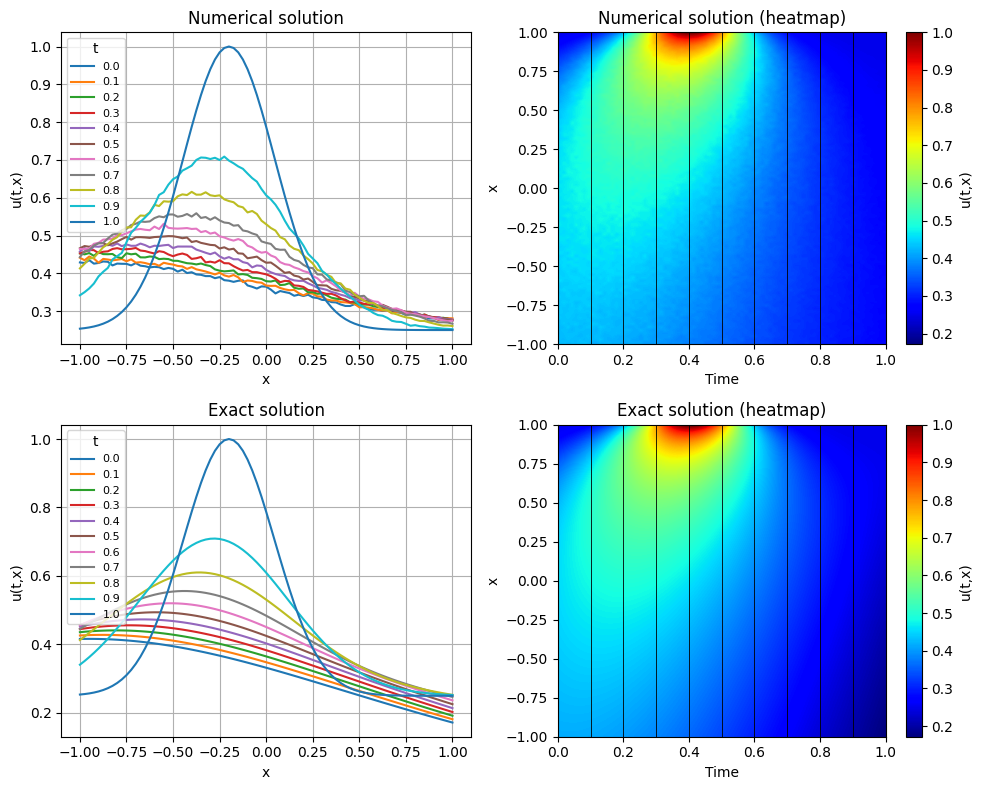

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1.0
x_min, x_max = -1.0, 1.0
n_x = 81
x_grid = np.linspace(x_min, x_max, n_x)

t_lines = np.linspace(0.0, T, 11)  # times for curves
n_t_heat = 101
t_heat = np.linspace(0.0, T, n_t_heat)  # times for heatmap

mu = 0.8  # drift parameter

# Terminal condition
def g(x):
    return 0.25 + 0.75 * np.exp(-(x + 0.2)**2 / 0.12)

# Exact solution: u(t,x) = E[g(X_T)]
def u_exact(t, x):
    tau = T - t
    if tau == 0.0:
        return g(x)
    y = np.linspace(-2.0, 2.0, 2001)
    coeff = 1.0 / np.sqrt(2 * np.pi * tau)
    mean = x + mu * tau
    phi = coeff * np.exp(-(y - mean)**2 / (2 * tau))
    return np.trapz(g(y) * phi, y)

# Monte Carlo approximation
rng = np.random.default_rng(123)

def u_mc(t, x, n_paths=5000):
    tau = T - t
    if tau == 0.0:
        return g(x)
    Z = rng.normal(0.0, 1.0, size=n_paths)
    XT = x + mu * tau + np.sqrt(tau) * Z
    return g(XT).mean()

# Compute solutions
U_exact_lines = np.zeros((len(t_lines), n_x))
U_mc_lines = np.zeros((len(t_lines), n_x))

for it, t in enumerate(t_lines):
    for ix, x in enumerate(x_grid):
        U_exact_lines[it, ix] = u_exact(t, x)
        U_mc_lines[it, ix] = u_mc(t, x)

U_exact_heat = np.zeros((len(t_heat), n_x))
U_mc_heat = np.zeros((len(t_heat), n_x))

for it, t in enumerate(t_heat):
    for ix, x in enumerate(x_grid):
        U_exact_heat[it, ix] = u_exact(t, x)
        U_mc_heat[it, ix] = u_mc(t, x)

vmin = min(U_mc_heat.min(), U_exact_heat.min())
vmax = max(U_mc_heat.max(), U_exact_heat.max())

# Plots
plt.figure(figsize=(10, 8))

# MC curves
plt.subplot(2, 2, 1)
for it, t in enumerate(t_lines):
    plt.plot(x_grid, U_mc_lines[it], label=f"{t:.1f}")
plt.title("Numerical solution")
plt.xlabel("x")
plt.ylabel("u(t,x)")
plt.grid(True)
plt.legend(title="t", fontsize=8, ncol=1, loc="upper left")

# MC heatmap
plt.subplot(2, 2, 2)
im1 = plt.imshow(
    U_mc_heat,
    extent=[0, T, x_min, x_max],
    origin="lower",
    aspect="auto",
    vmin=vmin, vmax=vmax,
    cmap="jet",
    interpolation="bilinear"
)
for t in t_lines:
    plt.axvline(t, color="k", linewidth=0.6)
plt.title("Numerical solution (heatmap)")
plt.xlabel("Time")
plt.ylabel("x")
plt.colorbar(im1, label="u(t,x)")

# Exact curves
plt.subplot(2, 2, 3)
for it, t in enumerate(t_lines):
    plt.plot(x_grid, U_exact_lines[it], label=f"{t:.1f}")
plt.title("Exact solution")
plt.xlabel("x")
plt.ylabel("u(t,x)")
plt.grid(True)
plt.legend(title="t", fontsize=8, ncol=1, loc="upper left")

# Exact heatmap
plt.subplot(2, 2, 4)
im2 = plt.imshow(
    U_exact_heat,
    extent=[0, T, x_min, x_max],
    origin="lower",
    aspect="auto",
    vmin=vmin, vmax=vmax,
    cmap="jet",
    interpolation="bilinear"
)
for t in t_lines:
    plt.axvline(t, color="k", linewidth=0.6)
plt.title("Exact solution (heatmap)")
plt.xlabel("Time")
plt.ylabel("x")
plt.colorbar(im2, label="u(t,x)")

plt.tight_layout()
plt.show()


The figures show, in a simple setting, how the Feynman–Kac theorem connects a PDE to an expectation over a stochastic process.
Here, the terminal bump $g(x)$ diffuses smoothly as time moves backward from $T$ to $t$, and we can reconstruct this evolution either by:

- Monte Carlo simulation of $x + B_{T-t}$, or
- heat-kernel integration, the semi-analytic reference.

The Monte Carlo curves follow the exact solution closely (with small sampling noise), and the heatmaps highlight the same diffusion pattern: the initial bump spreads and smooths over time.

This simple experiment illustrates the FK principle in its purest form.
We now apply exactly the same logic to finance, where the SDE is the geometric Brownian motion of Black–Scholes, and the associated PDE is the Black–Scholes pricing equation.


# 5. Application to the Black–Scholes model

We now apply this framework to the standard Black–Scholes model under the risk-neutral measure $\mathbb{P}^*$.

Under $\mathbb{P}^*$,

$$dS_t = S_t (r \, dt + \sigma \, dW_t), \quad S_0 > 0,$$

with constant $r, \sigma > 0$.

The infinitesimal generator acting on functions $u(t,x)$ of $(t,x) = (t,S)$ is

$$(A_{BS} u)(t,x) = \frac{1}{2} \sigma^2 x^2 u_{xx}(t,x) + r x \, u_x(t,x).$$

For a European payoff $f(S_T)$, the price $u(t,x)$ must solve the PDE

$$\begin{cases}
\partial_t u(t,x) + \frac{1}{2} \sigma^2 x^2 \, u_{xx}(t,x) + r x \, u_x(t,x) - r \, u(t,x) = 0, \\
u(T,x) = f(x).
\end{cases}$$

**European call/put.**

For a call with strike $K$,

$$f(x) = (x - K)^+,$$

for a put,

$$f(x) = (K - x)^+.$$

These terminal conditions, together with the PDE, characterise the Black–Scholes prices.
In 04.3, we already derived the closed-form solution and computed the Greeks.
Here, the emphasis is on the PDE representation and its probabilistic origin.


# 6. Log-transformed formulation

For some numerical methods, it is convenient to work in the log-space

$$X_t = \ln S_t.$$

Using Itô's formula, we know

$$dX_t = \left(r - \frac{1}{2}\sigma^2\right) dt + \sigma dW_t.$$

The generator in terms of $(t,x) = (t,\ln S)$ becomes

$$(\tilde{A}_{BS}v)(t,x) = \frac{1}{2}\sigma^2 v_{xx}(t,x) + \left(r - \frac{1}{2}\sigma^2\right) v_x(t,x)$$

if we absorb the discount term in the operator.

If we write the price as

$$F(t,S) = v(t,\ln S),$$

then $v$ solves

$$\begin{cases}
\partial_t v(t,x) + \frac{1}{2}\sigma^2 v_{xx}(t,x) + \left(r - \frac{1}{2}\sigma^2\right) v_x(t,x) - r v(t,x) = 0, \\
v(T,x) = f(e^x).
\end{cases}$$

This is a constant-coefficient parabolic PDE in the variable $x = \ln S$, which is often more convenient for finite difference schemes (see 05.2).


# 7. Bounded domains and barrier options (Dirichlet conditions)

So far, the PDE lives on the whole real line (or $(0,\infty)$ in the $S$-variable).
In practice, two kinds of restrictions appear:

**Numerical localisation:**
We restrict the spatial domain to a bounded interval, e.g. $x \in (-\ell, \ell)$, and impose approximate boundary conditions.
The localisation error can be controlled by estimates on the tails of $X$.

**Financial barriers:**
For barrier options (e.g. down-and-out, up-and-out), the contract is knocked out (value $\approx 0$) when the underlying leaves a region $O$.
In a log-space domain $O = (a,b)$, this corresponds to Dirichlet boundary conditions

$$u(t,a) = u(t,b) = 0$$

for a knock-out structure.

In log-space, we can consider

$$
\begin{cases}
\partial_t u(t,x) + \tilde{A} u(t,x) = 0, & (t,x) \in (0,T) \times (a,b), \\
u(t,a) = u(t,b) = 0, & t \in (0,T), \\
u(T,x) = f(e^x), & x \in (a,b),
\end{cases}
$$

which corresponds, at the probabilistic level, to a payoff that is cancelled when the diffusion hits the boundary and is absorbed there (killed process).

In 05.2, we will discretise such PDEs via finite differences and solve them numerically.


# 8. Numerical illustration: Feynman–Kac in the Black–Scholes model

We now verify numerically that, in the Black–Scholes model, the price of a European call given by:

- the closed-form Black–Scholes formula, and

- the Monte Carlo expectation

$$\mathbb{E}\left[e^{-rT}(S_T - K)^+\right]$$

computed from simulated GBM paths, are consistent.

We place the imports here, just before the first real code block.


In [ ]:
from scipy.stats import norm
import warnings

warnings.filterwarnings("ignore")

## 8.1 Black–Scholes closed-form price (call)

In [2]:
def bs_call_price(S0, K, T, r, sigma):
    if T <= 0:
        return max(S0 - K, 0.0)
    vol_sqrt_T = sigma * np.sqrt(T)
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / vol_sqrt_T
    d2 = d1 - vol_sqrt_T
    return S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

## 8.2 Simulating GBM under the risk-neutral measureure

We use the exact solution:

$$S_T = S_0 \exp\left(\left(r - \frac{1}{2}\sigma^2\right)T + \sigma\sqrt{T} \, Z\right), \quad Z \sim \mathcal{N}(0,1).

In [3]:
def simulate_gbm_terminal(S0, T, r, sigma, n_paths, rng=None):
    if rng is None:
        rng = np.random.default_rng(123)
    Z = rng.normal(0.0, 1.0, size=n_paths)
    ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
    return ST

## 8.3 Monte Carlo estimate vs Black–Scholes formula
We expect: mc_price close to bs_price, and the discrepancy of order a few standard errors mc_std_err.


In [4]:
# Parameters
S0 = 100.0
K = 100.0
r = 0.05
sigma = 0.2
T = 1.0

n_paths = 200_000
rng = np.random.default_rng(42)

# Simulate terminal prices
ST = simulate_gbm_terminal(S0, T, r, sigma, n_paths, rng=rng)

# Monte Carlo estimator of the discounted payoff
payoffs = np.exp(-r * T) * np.maximum(ST - K, 0.0)
mc_price = payoffs.mean()
mc_std_err = payoffs.std(ddof=1) / np.sqrt(n_paths)

# Closed-form BS price
bs_price = bs_call_price(S0, K, T, r, sigma)

mc_price, mc_std_err, bs_price


(np.float64(10.46341353619479),
 np.float64(0.03311755544123987),
 np.float64(10.450583572185565))

The Monte Carlo estimate yields a call price of **10.463**, with a standard error of **0.033**.
The Black–Scholes closed-form formula gives **10.451**.
The difference between the two is approximately **0.013**, which is well within one standard error. This confirms that:

- The Monte Carlo simulation correctly implements the risk-neutral dynamics of the geometric Brownian motion.
- The Feynman–Kac representation holds: the expectation of the discounted payoff matches the analytical PDE solution.
- With 200,000 paths, the Monte Carlo estimator has converged sufficiently to validate the theoretical equivalence.

This numerical experiment illustrates the **Feynman–Kac theorem** in action: the probabilistic representation (Monte Carlo) and the deterministic PDE solution (Black–Scholes formula) are two sides of the same valuation framework.

## 8.4 Visualising the Monte Carlo distribution

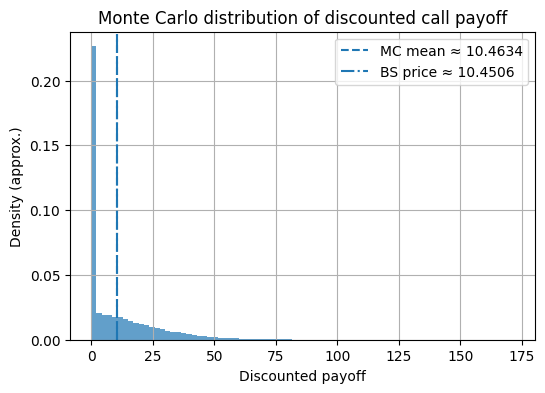

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(payoffs, bins=80, density=True, alpha=0.7)
plt.axvline(mc_price, linestyle="--", label=f"MC mean ≈ {mc_price:.4f}")
plt.axvline(bs_price, linestyle="-.", label=f"BS price ≈ {bs_price:.4f}")
plt.xlabel("Discounted payoff")
plt.ylabel("Density (approx.)")
plt.title("Monte Carlo distribution of discounted call payoff")
plt.legend()
plt.grid(True)
plt.show()

The shape is strongly right-skewed: most payoffs are near 0, while a few paths generate very large values, exactly what a call option produces under a lognormal terminal price.

The dashed line marks the Monte Carlo mean (~10.463), and the dash-dot line the Black–Scholes price (~10.451). Their near-equality shows that the Monte Carlo estimator accurately reproduces the theoretical BS value, fully consistent with the small standard error (~0.033).

This simple experiment illustrates the Feynman–Kac connection in the Black–Scholes framework:
we simulate the SDE for $S_t$, compute the discounted payoff $e^{-rT}(S_T - K)^+$, and the sample average numerically approximates the solution of the Black–Scholes PDE at $(t=0, x=S_0)$.
